In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram 
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_state_city,plot_state_qsphere
%matplotlib inline

In [2]:
from qiskit.tools.visualization import plot_histogram


In [3]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
# set up circuit (no measurements required)
qc = QuantumCircuit(2)
qc.x(0) # qubits numbered from the right, so qubit 0 is the qubit on the right
qc.z(1) # and qubit 1 is on the left

# set up simulator that returns unitary matrix
backend = Aer.get_backend('unitary_simulator')

# run the circuit to get the matrix
gate = execute(qc,backend).result().get_unitary()
gate

array([[ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
       [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j]])

In [23]:
provider= IBMQ.get_provider(hub='ibm-q')
for x in provider.backends():
    print(x.status())
    try:
        print("qbit count=",len(x.properties().qubits))
    except:
        print('simulated')

BackendStatus(backend_name='ibmq_qasm_simulator', backend_version='0.0.0', operational=True, pending_jobs=0, status_msg='active')
simulated
BackendStatus(backend_name='ibmqx2', backend_version='2.0.0', operational=True, pending_jobs=0, status_msg='active')
qbit count= 5
BackendStatus(backend_name='ibmq_16_melbourne', backend_version='1.0.0', operational=True, pending_jobs=10, status_msg='active')
qbit count= 14
BackendStatus(backend_name='ibmq_vigo', backend_version='1.0.2', operational=True, pending_jobs=8, status_msg='active')
qbit count= 5
BackendStatus(backend_name='ibmq_ourense', backend_version='1.0.1', operational=True, pending_jobs=10, status_msg='active')
qbit count= 5
BackendStatus(backend_name='ibmq_london', backend_version='1.0.0', operational=True, pending_jobs=0, status_msg='active')
qbit count= 5
BackendStatus(backend_name='ibmq_burlington', backend_version='1.1.4', operational=True, pending_jobs=0, status_msg='active')
qbit count= 5
BackendStatus(backend_name='ibmq_esse

In [12]:
qr=QuantumRegister(8)
cr=ClassicalRegister(8)
qc=QuantumCircuit(8,8)
n=8

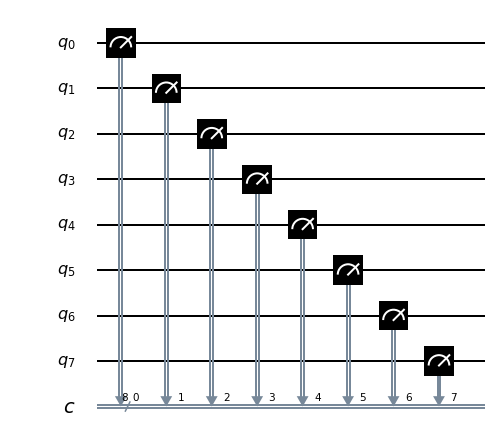

In [14]:
for t in range(n):
    qc.measure(t,t)
#mes=qc.measure(8,8)
qc.draw(output='mpl')

In [6]:
counts=execute(qc,Aer.get_backend('qasm_simulator'),shots=3000).result().get_counts()
# plot_histogram(counts)
counts

{'00000000': 3000}

{'00000000': 2000}


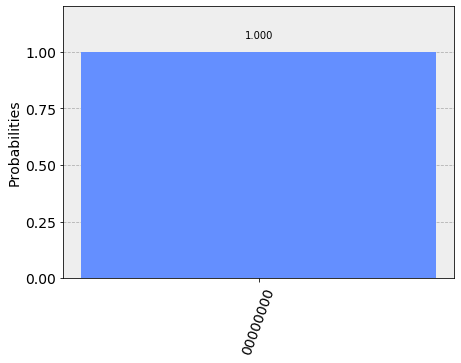

In [33]:
bac=Aer.get_backend('qasm_simulator')
exe=execute(qc,bac,shots=2000)
count=exe.result().get_counts()
print(count)
plot_histogram(count)

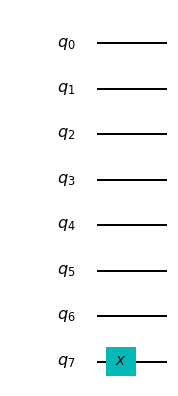

In [8]:
n=8
qc1=QuantumCircuit(n)
qc1.x(7)
qc1.draw(output='mpl')

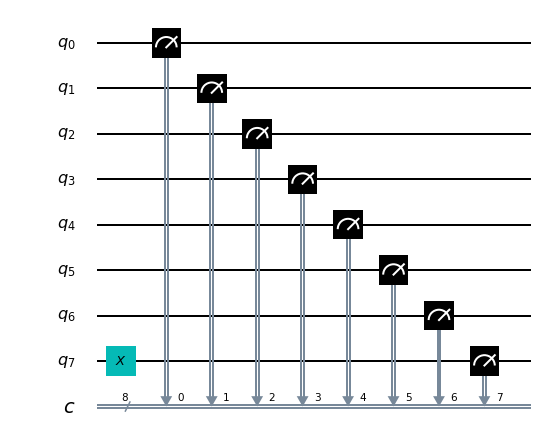

In [15]:
qc2=qc1+ qc
qc2.draw(output="mpl",justify='none')

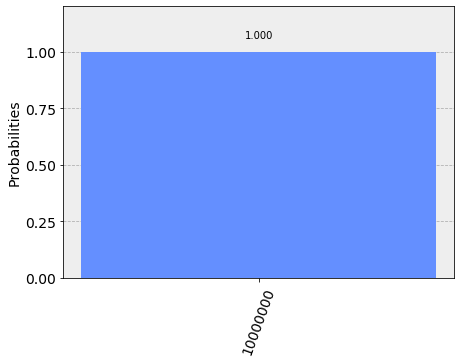

In [19]:
count=execute(qc2,bac, shots=3000).result().get_counts()
plot_histogram(count)

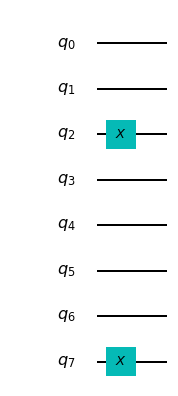

In [20]:
qc1.x(2)
qc1.draw(output="mpl")

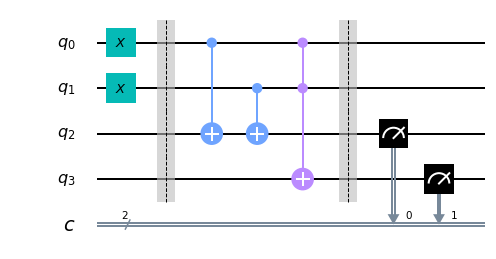

In [22]:
qc3=QuantumCircuit(4,2)
qc3.x(0)
qc3.x(1)
qc3.barrier()
qc3.cx(0,2)
qc3.cx(1,2)
#qc3.barrier()
qc3.ccx(0,1,3)
qc3.barrier()
qc3.measure(2,0)
qc3.measure(3,1)
qc3.draw(output='mpl')

In [26]:
provider=IBMQ.get_provider('ibm-q')
counts = execute(qc3,provider.get_backend('ibmq_london'),shots =1000)
#
job_monitor(counts)
#plot_histogram(counts)

Job Status: job has successfully run


In [35]:
counts.result().get_counts
# print(c)
# # plot_histogram([c])

<bound method Result.get_counts of Result(backend_name='ibmq_london', backend_version='1.0.0', date=datetime.datetime(2019, 12, 1, 3, 48, 27, tzinfo=datetime.timezone.utc), execution_id='69f93962-13ed-11ea-968c-ac1f6b46a194', header=Obj(backend_name='ibmq_london', backend_version='1.0.0'), job_id='5de337fb5910fa0011cc089d', qobj_id='8db9c1ba-2ca0-4121-a97e-682224fc4826', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=206, 0x1=32, 0x2=720, 0x3=42)), header=Obj(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], memory_slots=2, n_qubits=5, name='circuit13', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), meas_level=2, memory=False, shots=1000, success=True)], status='Successful completion', success=True, time_taken=9.356179475784302)>

In [3]:

qr= QuantumRegister(2)
cr= ClassicalRegister(2)
qc= QuantumCircuit(qr,cr)
qc.x(0)
qc.h(0)
qc.z(0)
qc.x(1)
qc.y(1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

In [4]:

bc1=Aer.get_backend("qasm_simulator")
bc2=Aer.get_backend("statevector_simulator")
bc3=Aer.get_backend("unitary_simulator")

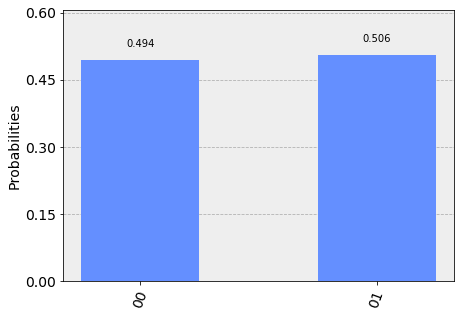

In [5]:
job1=execute(qc,bc1,shots=3000).result().get_counts()#quasm
plot_histogram(job1)


In [6]:
job2=execute(qc,bc2).result().get_statevector()#sv
for amplitude in job2:
    print(amplitude)


-1j
0j
0j
0j


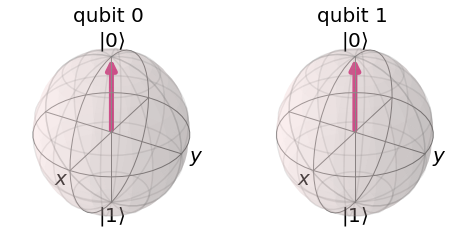

In [7]:
plot_bloch_multivector(job2)

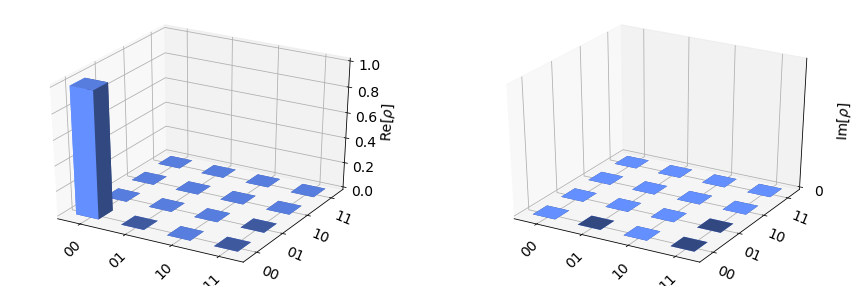

In [8]:

plot_state_city(job2) 